####  импорт библиотек:

In [40]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode

#### загрузка данных с Яндекс Диска:

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key_customers = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
public_key_orders = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
public_key_order_items = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

final_url_customers = base_url + urlencode(dict(public_key=public_key_customers)) 
final_url_orders = base_url + urlencode(dict(public_key=public_key_orders))
final_url_key_order_items = base_url + urlencode(dict(public_key=public_key_order_items))


olist_customers_dataset = pd.read_csv(requests.get(final_url_customers).json()['href'])
olist_orders_dataset = pd.read_csv(requests.get(final_url_orders).json()['href'])
olist_order_items_dataset = pd.read_csv(requests.get(final_url_key_order_items).json()['href'])

#### 1. Найдем количество пользователей, которые совершили покупку только один раз

In [3]:
# будем считать, что пользователи, совершившие покупку один раз - это те пользователи, которые
# сделали только 1 заказ, который был оплачен и доставлен

In [4]:
# отберем в датафрэйм good_orders оплаченные заказы, которые были доставлены

good_orders = olist_orders_dataset \
    .dropna(subset=['order_approved_at']) \
    .query('order_status =="delivered"')
good_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# теперь объединим этот датафрэйм с olist_customers_dataset, чтобы получить уникальные id пользователей

good_orders_merge_customers = good_orders.merge(olist_customers_dataset, how='inner', on='customer_id')
good_orders_merge_customers.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [6]:
# Выведем с помощью value_counts количество уникальных значений для каждого уникального идентификатора пользователя.
# Преобразуем полученный Series в датафрэйм quantity_of_orders_by_customer

quantity_of_orders_by_customer = good_orders_merge_customers.customer_unique_id.value_counts().to_frame(name='quantity')
quantity_of_orders_by_customer

,quantity
8d50f5eadf50201ccdcedfb9e2ac8455,15
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
7a058fb903db07aea7cad4ed26301dd1,1
54c665eb48d502792c20af5ed9166359,1
57c7328718a984a6d070841c93386322,1
83130495663da4195aacc1fceea553b6,1


In [7]:
# теперь посчитаем количество тех покупателей, у которых количество строк оказалось равно 1  
quantity_of_orders_by_customer.query('quantity==1').count()

quantity    90545
dtype: int64

ответ: 90545 покупателей совершили покупку только 1 раз

#### 2. Проверим, сколько заказов в месяц в среднем не доставляется с детализацией по причинам

In [39]:
# предобработка данных: преобразуем нужные нам столбцы с датой и временем в тип datetime
olist_orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])

In [40]:
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])

In [41]:
# Сначала отберем из таблицы с данными заказов только нужные нам столбцы: id заказа, статус заказа и дата, когда он должен был быть доставлен.
# И выберем из всех заказов только те, которые не были доставлены

orders_not_delivered = olist_orders_dataset[['order_id', 'order_status', 'order_estimated_delivery_date']].query('order_status!="delivered"')

In [42]:
orders_not_delivered.head(5)

,order_id,order_status,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-10-03
154,6942b8da583c2f9957e990d028607019,shipped,2018-02-07


In [43]:
# проверим, нет ли в данных пропусков
orders_not_delivered.isna().sum()

order_id                         0
order_status                     0
order_estimated_delivery_date    0
dtype: int64

In [44]:
# добавим в датафрэйм еще два столбца, куда поместим номер месяца и года из даты
orders_not_delivered['month'] = orders_not_delivered['order_estimated_delivery_date'].dt.month
orders_not_delivered['year'] = orders_not_delivered['order_estimated_delivery_date'].dt.year

In [45]:
orders_not_delivered.head(5)

,order_id,order_status,order_estimated_delivery_date,month,year
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-05-09,5,2017
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-28,6,2018
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-21,8,2018
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-10-03,10,2017
154,6942b8da583c2f9957e990d028607019,shipped,2018-02-07,2,2018


In [46]:
# найдем общее количество месяцев, за которые у нас есть сведения о заказах
total_quantity_of_months = orders_not_delivered.groupby('year', as_index=False).agg({'month':'nunique'}).month.sum()
total_quantity_of_months

26

In [47]:
# создадим список всех статусов заказов, которые есть в датафрэйме
list_of_order_statuses = []
for i in orders_not_delivered.order_status:
    if i not in list_of_order_statuses:
        list_of_order_statuses.append(i)
list_of_order_statuses

['invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [48]:
#для каждого статуса заказа из списка посчитаем среднее количество в месяц: разделим количество строк с таким статусом
# на количество месяцев

for j in list_of_order_statuses:
    print (j, orders_not_delivered.query("order_status==@j").order_id.count()/total_quantity_of_months)

invoiced 12.076923076923077
shipped 42.57692307692308
processing 11.576923076923077
unavailable 23.423076923076923
canceled 24.03846153846154
created 0.19230769230769232
approved 0.07692307692307693


In [15]:
# демонстрация того, что среди заказов нет тех, которые будут доставлены позже
# (и поэтому все заказы кроме заказов со статусом delivered можно считать недоставленными)
# видно, что заказ с самой поздней обещанной датой доставки должен был быть доставлен 18.09.2018
# а этот срок уже прошел т.к. среди доставленных заказов последние доставлены 17.10.2018 
# а значит датасет был сформирован после 17 октября 2018 года
# (см. следующую ячейку)

orders_not_delivered.query('order_status!="canceled"').sort_values(by='order_estimated_delivery_date').tail(5)

,order_id,order_status,order_estimated_delivery_date,month,year
46485,f79d2206d0301d47bc2a623636ea53d1,shipped,2018-08-30,8,2018
87590,5e6f7229aec06e67732033777ee84816,shipped,2018-09-04,9,2018
60511,b1c978cd633caac1ce86e36b61e8aeb3,shipped,2018-09-06,9,2018
62360,54282e97f61c23b78330c15b154c867d,shipped,2018-09-06,9,2018
29454,00a99c50fdff7e36262caba33821875a,shipped,2018-09-18,9,2018


In [16]:
olist_orders_dataset.query('order_status=="delivered"').sort_values(by='order_delivered_customer_date').tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
56635,450cb96c63e1e5b49d34f223f67976d2,27ae7c8a8fc20ce80d96f01b6f19961b,delivered,2018-05-21 06:48:46,2018-05-21 06:57:03,2018-06-01 13:14:00,2018-10-11 16:41:14,2018-06-27
18731,7e708aed151d6a8601ce8f2eaa712bf4,033fab69968b0d69099d64423831a236,delivered,2018-06-02 18:37:14,2018-06-02 18:51:31,2018-06-04 13:42:00,2018-10-17 13:22:46,2018-07-13
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [17]:
# также обнаружена аномалия в данных:  есть 8 заказов, у которых статус delivered и при этом 
# нет данных в графе "время доставки заказа"
# это говорит об ошибке при сборе данных, в причинах которой нужно разобраться

olist_orders_dataset.query('order_status=="delivered" and order_delivered_customer_date.isna()==True')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [18]:
# проверим, как часто реальная доставка товара происходит позже обещанной даты
# 7826 заказов были доставлены позже срока

olist_orders_dataset.query('order_status=="delivered" and order_delivered_customer_date>order_estimated_delivery_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02
...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09


In [19]:
num_of_delivered_orders = olist_orders_dataset.query('order_status=="delivered"').order_id.count()
num_of_delivered_orders

96478

In [20]:
num_of_late_orders = olist_orders_dataset.query('order_status=="delivered" and order_delivered_customer_date>order_estimated_delivery_date').order_id.count()
num_of_late_orders

7826

In [21]:
# доля заказов, доставленных с опозданием, около 8% от общего количества доставленных заказов

num_of_late_orders/num_of_delivered_orders

0.08111693857667032

In [51]:
# посмотрим на сроки опоздания (опоздание отражено в графе late_time со знаком плюс,
# вовремя доставленные заказы - со знаком минус)
olist_orders_dataset ['late_time'] = olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_estimated_delivery_date'] 
olist_orders_dataset[['order_id', 'order_status', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'late_time']]

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,late_time
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-17 18:06:29,2018-09-04,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02 00:28:42,2017-12-15,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-16 18:17:02,2018-02-26,-10 days +18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-17 15:08:01,2017-03-28,-11 days +15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-28 17:37:56,2018-03-02,-2 days +17:37:56
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-09-21 11:24:17,2017-09-27,-6 days +11:24:17
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-25 23:32:54,2018-02-15,-21 days +23:32:54


In [52]:
# переводим срок опоздания в дни
olist_orders_dataset ['late_time'] = olist_orders_dataset.late_time.dt.days

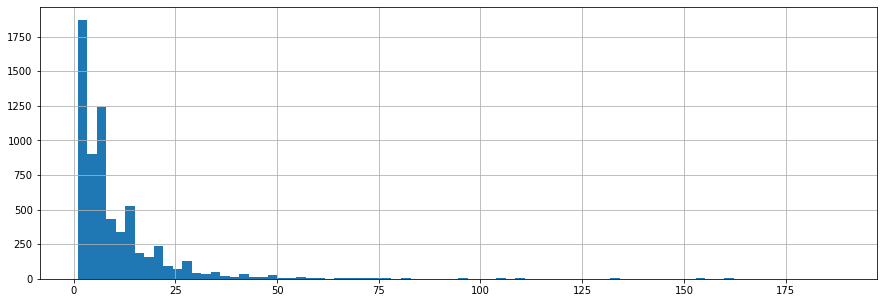

In [27]:
# гистограмма распределения количества опоздавших доставленных заказов по количеству дней

plt.figure(figsize=(15, 5))
olist_orders_dataset.query('late_time>0 and order_status=="delivered"').late_time.hist(bins=80)


#### Результат (данные округлены до целых):
в месяц не доставляется в среднем <br>
24 заказа по причине отмены,<br>
23 заказа по причине недоступности,<br><br>
43 заказа в месяц не доставляются видимо по причины утери логистической службой или задержки доставки (так как они отгружены со склада, но покупателю не доставлены. При этом дата обещанной доставки у них уже прошла, так что нельзя сказать, что они находятся в процессе доставки. Как видно из гистограммы в предыдущей ячейке, подавляющее большинство опазывающих заказов доставляется с задержкой не более 25 дней, а в этом случае с обещанной даты доставки прошло уже более месяца. Можно сделать вывод, что из этих 43 заказов возможно 1-2 не доставлены по причине опоздания)<br><br>
25 заказов не доставлены по внутренним причинам (т.к. они созданы, оплачены, но в логистическую службу не переданы. из них 12 застряли после этапа выставления счета(invoiced), 12 в процессе сборки заказа(processing), а также менее 1 заказа в месяц застревают после стадий создания и подтверждения заказа. Эти заказы также уже не находятся в процессе обработки так как обещанная дата доставки по ним истекла).

#### 3. По каждому товару проанализируем, в какой день недели товар чаще всего покупается

здесь будем учитывать все оплаченные товары (даже если они в дальнейшем не попали к покупателю)
днем покупки будем считать день подтверждения оплаты покупателем (графа order_approved_at)

In [34]:
# объединим два датафрэйма: таблицу заказов и товарные позиции, входящие в заказы в новый датафрэйм products_with_dates

products_with_dates = olist_order_items_dataset.merge(olist_orders_dataset, on='order_id', how='inner')

In [35]:
# переведем дату подтверждения оплаты заказа в тип datetime

products_with_dates.order_approved_at = pd.to_datetime(products_with_dates.order_approved_at)

In [36]:
# добавим в объединенный датафрэйм новый столбец - название дня недели, когда был оплачен товар 

products_with_dates['week_day_of_approving_order'] = products_with_dates['order_approved_at'].dt.day_name()

In [37]:
# оставим в датафрэйме только нужные нам столбцы: id заказа, id товара и день недели, когда он был оплачен

products_with_dates = products_with_dates[['order_id', 'product_id', 'week_day_of_approving_order']]
products_with_dates.head(5)

,order_id,product_id,week_day_of_approving_order
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,Saturday


In [38]:
# создание списка уникальных id товаров и количества уникальных дней недели, в которые они продавались.
# отфильтрованы три товара, по которым количество дней оказалось равно 0.

list_of_products = products_with_dates.groupby('product_id', as_index=False) \
    .agg({'week_day_of_approving_order':'nunique'}) \
    .sort_values(by='week_day_of_approving_order', ascending=False) \
    .query('week_day_of_approving_order!=0')
list_of_products

,product_id,week_day_of_approving_order
19475,9794fba8c8aa64ab4fece2d3cbe731e9,7
15574,78119fbfa709d07b86f5ccf15043c6d6,7
23232,b532349fe46b38fbc7bb3914c1bdae07,7
689,05a9dadb8402b6b7ae3dd28f7da187b5,7
5659,2b0ee2d07306f7c9ac55a43166e9bb4b,7
...,...,...
13521,6877393202eb24747508f62474a2c1c7,1
13520,687686c6408c9389febfde350b99c82c,1
13518,687578da8cc5f5b3da7d328a5aebadf7,1
13516,68749ef9499d72290629ec3f71596d34,1


In [39]:
# проверим, что произошло с товарами, по которым количество дней оказалось равно 0.
# для начала найдем их id

list_of_products_0 = products_with_dates.groupby('product_id', as_index=False) \
    .agg({'week_day_of_approving_order':'nunique'}) \
    .sort_values(by='week_day_of_approving_order', ascending=False) \
    .query('week_day_of_approving_order==0')
list_of_products_0

,product_id,week_day_of_approving_order
10379,4fd676d9c4723d475026e40aeae56957,0
5817,2c2b6a28924791234bd386bddb17512e,0
28303,db8ed3d08891d16a2438a67ab3acb740,0


In [40]:
olist_order_items_dataset.query('product_id in ["4fd676d9c4723d475026e40aeae56957", "2c2b6a28924791234bd386bddb17512e", "db8ed3d08891d16a2438a67ab3acb740"]')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
20473,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23
26393,3c0b8706b065f9919d0505d3b3343881,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20
60815,8a9adc69528e1001fc68dd0aaebbb54a,1,2c2b6a28924791234bd386bddb17512e,a4b6b9b992b46e9ef863637af96e04bc,2017-02-22 11:45:31,379.00,17.86


In [41]:
# эти товары были заказаны и доставлены, но не были оплачены, поэтому не будем считать их купленными и включать в результат

olist_orders_dataset.query('order_id in ["2eecb0d85f281280f79fa00f9cec1a95", "3c0b8706b065f9919d0505d3b3343881", "8a9adc69528e1001fc68dd0aaebbb54a"]')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00
72407,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaN,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00


In [30]:
# создаем два списка: в одном будут уникальные id товаров, во втором - соответствующие им дни недели, на которые пришлось 
# максимальное количество покупок
product_id = []
week_day = []

In [31]:
# внимание! время выполнения ячейки 7-8 минут!

# для каждого id товара выполняем следующие действия:
# помещаем id товара в список id товаров
# добавляем в список week_day день недели по следующему правилу
# отбираем те строки таблицы, которые отноcятся к данному product_id
# считаем, сколько раз встречаются определенные дни недели
# берем первую строку получившегося списка с днем, который встречается чаще всего
# преобразуем результат в датафрэйм
# вытаскиваем из датафрэйма название дня недели и помещаем его в список week_day

for i in list_of_products.product_id:
    product_id.append(i)
    week_day.append(products_with_dates \
                    .query('product_id==@i') \
                    .week_day_of_approving_order \
                    .value_counts() \
                    .head(1) \
                    .to_frame('week_day_of_approving_order') \
                    .reset_index() \
                    .rename(columns={'index':'day'}) \
                    .day[0])
    

In [32]:
# два созданных списка объединяем в один датафрэйм result

result = pd.DataFrame({'product_id':product_id, 'week_day':week_day})

In [33]:
# результирующий датафрэйм: каждому product_id соответствует день недели, в который этот товар чаще всего покупали.
# днем покупки я решила считать день подтверждения оплаты заказа.
# если было несколько таких дней недели, когда количество покупок было одинаково высоким, то взят один из этих дней,
# который оказался первым при сортировке

result

,product_id,week_day
0,9794fba8c8aa64ab4fece2d3cbe731e9,Tuesday
1,78119fbfa709d07b86f5ccf15043c6d6,Thursday
2,b532349fe46b38fbc7bb3914c1bdae07,Tuesday
3,05a9dadb8402b6b7ae3dd28f7da187b5,Thursday
4,2b0ee2d07306f7c9ac55a43166e9bb4b,Thursday
...,...,...
32943,6877393202eb24747508f62474a2c1c7,Saturday
32944,687686c6408c9389febfde350b99c82c,Wednesday
32945,687578da8cc5f5b3da7d328a5aebadf7,Tuesday
32946,68749ef9499d72290629ec3f71596d34,Monday


<b>проверка</b>: возьмем товар с id b532349fe46b38fbc7bb3914c1bdae07 продажи которого были во все дни недели<br>
и проверим, действительно ли он чаще всего продавался во вторник                                                                                            

In [34]:
# да, всё верно

products_with_dates.query('product_id=="b532349fe46b38fbc7bb3914c1bdae07"').week_day_of_approving_order.value_counts()

Tuesday      35
Thursday     31
Monday       31
Friday       25
Saturday     22
Wednesday    15
Sunday       10
Name: week_day_of_approving_order, dtype: int64

#### 4. Найдем, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. Учтем это внутри метрики.

In [35]:
# количеством покупок я решила считать количество товаров (product_id), по которым в этом месяце есть подтверждение оплаты
# кроме заказов со статусом unavailable и canceled 
# но необязательно, чтобы они уже были доставлены

In [36]:
# объединим два датафрэйма - таблицу заказов и  товарные позиции, входящие в заказы
customers_merge_orders = olist_orders_dataset.merge(olist_order_items_dataset, how='inner', on='order_id')

In [37]:
# посмотрим, если ли в каких то колонках пропущенные значения
customers_merge_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [38]:
# уберем из датафрэйма строки с пропусками в столбце даты подтверждения заказа (order_approved_at), 
# чтобы избавиться от неоплаченных заказов
# а также строки с отмененными и недоступными заказами

customers_merge_orders = customers_merge_orders.dropna(subset=['order_approved_at']) \
    .query('order_status!="canceled" and order_status!="unavailable"')

In [39]:
# переведем столбец с датой подтверждения оплаты заказа в тип datetime
customers_merge_orders['order_approved_at'] = pd.to_datetime(customers_merge_orders['order_approved_at'])

In [40]:
# создадим новые столбцы, в которые поместим 1) месяц и год оплаты заказа 2) номер месяца 3) номер года

customers_merge_orders['year_month'] = customers_merge_orders['order_approved_at'].dt.to_period('M')
customers_merge_orders['month'] = customers_merge_orders['order_approved_at'].dt.month
customers_merge_orders['year'] = customers_merge_orders['order_approved_at'].dt.year

In [41]:
# поменяем тип данных в столбце с годом на int

customers_merge_orders.year = customers_merge_orders.year.astype(int)

In [42]:
# проверим, данные за какие года есть в датафрэйме (для того, чтобы в дальнейшем опредеделить, високосный год или нет
# и поставить соответствующее количество дней в феврале)
customers_merge_orders.year.value_counts()

2018    61197
2017    50541
2016      348
Name: year, dtype: int64

In [43]:
# создадим новый датафрэйм customers_merge_orders_, куда поместим только нужные нам столбцы из старого датафрэйма

customers_merge_orders_ = customers_merge_orders[['customer_id', 'order_id', 'product_id', 'order_approved_at', 'year_month', 'month', 'year']]
customers_merge_orders_.head(5)

,customer_id,order_id,product_id,order_approved_at,year_month,month,year
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,2017-10-02 11:07:15,2017-10,10,2017
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,2018-07-26 03:24:27,2018-07,7,2018
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:55:23,2018-08,8,2018
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:45:59,2017-11,11,2017
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 22:20:29,2018-02,2,2018


In [44]:
# создадим еще один столбец number_of_days_in_month с количеством дней в месяце
# для заполнения данных этого столбца используем функцию days_number,
# которая ставит 30, 31 , 28 или 29 дней в зависимости от месяца и високосности года.
# как мы посмотрели ранее, данные у нас представлены за 3 года: 2016, 2017 и 2018.
# из них високосный только 2016, поэтому 29 дней может быть только в феврале 2016
def days_number(df):    
    if (df['month'] in [4, 6, 9, 11]):
        return 30
    elif (df['month'] in [1, 3, 5, 7, 8, 10, 12]):
        return 31
    elif (df['month'] == 2 & df['year']==2016):
        return 29
    elif (df['month'] == 2 & df['year']!=2016):
        return 28

customers_merge_orders_['number_of_days_in_month'] = customers_merge_orders_.apply(days_number, axis=1)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [45]:
customers_merge_orders_.head(5)

,customer_id,order_id,product_id,order_approved_at,year_month,month,year,number_of_days_in_month
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,2017-10-02 11:07:15,2017-10,10,2017,31.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,2018-07-26 03:24:27,2018-07,7,2018,31.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:55:23,2018-08,8,2018,31.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:45:59,2017-11,11,2017,30.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 22:20:29,2018-02,2,2018,28.0


In [46]:
# посчитаем количество недель в каждом месяце, разделив количество дней в месяце на 7
# создадим новый столбец number_of_weeks_in_month с полученным значением


customers_merge_orders_['number_of_weeks_in_month'] = customers_merge_orders_.number_of_days_in_month/7

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
# объединим теперь полученный датафрэйм с датафрэймом olist_customers_dataset
# чтобы вытащить оттуда id-шники customer_unique_id

customers_merge_products = customers_merge_orders_.merge(olist_customers_dataset, on='customer_id', how='inner')

In [48]:
# создадим новый датафрэйм customers_merge_products_, в который поместим только нужные нам колонки из customers_merge_products
customers_merge_products_ = customers_merge_products[['customer_unique_id', 'customer_id', 'order_id', 'product_id', 'year_month', 'order_approved_at', 'month', 'year', 'number_of_days_in_month', 'number_of_weeks_in_month']]
customers_merge_products_.head(5)

,customer_unique_id,customer_id,order_id,product_id,year_month,order_approved_at,month,year,number_of_days_in_month,number_of_weeks_in_month
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,2017-10,2017-10-02 11:07:15,10,2017,31.0,4.428571
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,2018-07,2018-07-26 03:24:27,7,2018,31.0,4.428571
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,2018-08,2018-08-08 08:55:23,8,2018,31.0,4.428571
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11,2017-11-18 19:45:59,11,2017,30.0,4.285714
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2018-02,2018-02-13 22:20:29,2,2018,28.0,4.000000


In [49]:
# сгруппируем данные по customer_unique_id и месяцам и найдем количество купленных товаров каждым клиентом по месяцам
x = customers_merge_products_.groupby(['customer_unique_id', 'year_month', 'number_of_weeks_in_month'], as_index=False) \
    .agg({'product_id':'count'}) \
    .rename(columns={'product_id':'products_quantity'}) \
    .sort_values(by='products_quantity', ascending=False)
x

,customer_unique_id,year_month,number_of_weeks_in_month,products_quantity
74536,c8460e4251689ba205045f3ea17884a1,2018-08,4.428571,24
25828,4546caea018ad8c692964e3382debd19,2017-07,4.428571,21
72961,c402f431464c72e27330a67f7b94d4fb,2018-02,4.000000,20
39349,698e1cf81d01a3d389d96145f7fa6df8,2017-08,4.428571,20
5729,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,4.285714,18
...,...,...,...,...
33505,59bd535b5f613b4b22d265e25b3ca304,2018-04,4.285714,1
33504,59bce16833989b11ae38fac262b8c65e,2017-12,4.428571,1
33502,59bb7f7d12d8ff37f1f8e6909d1b03dc,2018-05,4.428571,1
33501,59bb10015afb7afabc67252dbbf21985,2018-08,4.428571,1


In [50]:
# найдем среднее количество покупок в неделю для каждого из пользователей, 
# разделив количество его покупок в месяце на количество недель в этом месяце
# что и требовалось сделать в задании

x['avg_number_of_products_weekly'] = x['products_quantity']/x['number_of_weeks_in_month']
x

,customer_unique_id,year_month,number_of_weeks_in_month,products_quantity,avg_number_of_products_weekly
74536,c8460e4251689ba205045f3ea17884a1,2018-08,4.428571,24,5.419355
25828,4546caea018ad8c692964e3382debd19,2017-07,4.428571,21,4.741935
72961,c402f431464c72e27330a67f7b94d4fb,2018-02,4.000000,20,5.000000
39349,698e1cf81d01a3d389d96145f7fa6df8,2017-08,4.428571,20,4.516129
5729,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,4.285714,18,4.200000
...,...,...,...,...,...
33505,59bd535b5f613b4b22d265e25b3ca304,2018-04,4.285714,1,0.233333
33504,59bce16833989b11ae38fac262b8c65e,2017-12,4.428571,1,0.225806
33502,59bb7f7d12d8ff37f1f8e6909d1b03dc,2018-05,4.428571,1,0.225806
33501,59bb10015afb7afabc67252dbbf21985,2018-08,4.428571,1,0.225806


In [53]:
# для наглядности можно то же самое представить в виде сводной таблицы:
x.pivot(index='customer_unique_id', columns='year_month', values='avg_number_of_products_weekly').head(30)

year_month,2016-09,2016-10,2016-12,2017-01,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004bd2a26a76fe21f786e4fbd80607f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.233333,NaN,NaN,NaN,NaN,NaN
00050ab1314c0e55a6ca13cf7181fecf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.233333,NaN,NaN,NaN,NaN,NaN
00053a61a98854899e70ed204dd4bafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0005e1862207bf6ccc02e4228effd9a0,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. Выполним когортный анализ пользователей. В период с января по декабрь выявим когорту с самым высоким retention на 3-й месяц.

In [8]:
# для выполнения этого задания я разобью покупателей на когорты по месяцам, когда они совершили первую покупку.
# покупкой здесь я буду считать оплаченные и неотмененные заказы, независимо от того, были ли они в итоге доставлены

In [10]:
# переведем столбцы исходного датафрэйма с датами и времененем в тип datetime
olist_orders_dataset[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = olist_orders_dataset[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] \
    .astype('datetime64')

In [11]:
olist_orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
# объединим датафрэймы с пользователями и с заказами
# оставим только строки, где есть дата подтверждения оплаты, и заказ не был отменен
customers_merge_orders = olist_customers_dataset.merge(olist_orders_dataset, how='inner', on='customer_id')
customers_merge_orders = customers_merge_orders.query('order_status!="canceled"').dropna(subset=['order_approved_at'])
customers_merge_orders.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


In [13]:
# добавим в этот дадафрэйм столбец с годом и месяцем покупки y_m
customers_merge_orders['y_m'] = customers_merge_orders['order_approved_at'].dt.to_period('M')

In [14]:
# в новый датафрэйм перенесем только нужные нам столбцы
# датой покупки я буду считать дату подтверждения оплаты
customers_merge_orders_ = customers_merge_orders[['customer_unique_id', 'order_id', 'order_status', 'order_approved_at', 'y_m']]

In [15]:
customers_merge_orders_.head()

,customer_unique_id,order_id,order_status,order_approved_at,y_m
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,2018-07


In [17]:
# найдем дату первой покупки для каждого клиента
first_order_dates = customers_merge_orders_.groupby('customer_unique_id').order_approved_at.min().to_frame().reset_index(). \
    rename(columns={'order_approved_at':'Day_0'})
first_order_dates.head()

,customer_unique_id,Day_0
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [18]:
# создадим столбец с периодом первой покупки (датой и месяцем)
first_order_dates['year_month_0'] = first_order_dates['Day_0'].dt.to_period('M')

In [19]:
first_order_dates.head(5)

,customer_unique_id,Day_0,year_month_0
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11


In [22]:
# оставим только пользователей, у которых первая покупка произошла с января по декабрь 2017 года
# т.к. это одно из условий задания
first_order_dates_2017 = first_order_dates.query('year_month_0.dt.year=="2017"')
first_order_dates_2017.head()

,customer_unique_id,Day_0,year_month_0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:43:26,2017-03
10,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:30:22,2017-07


In [27]:
# разобьем всех пользователей на когорты по месяцам совершения первого заказа
cohorts = first_order_dates_2017.groupby(['year_month_0', 'customer_unique_id'], as_index=False). \
    agg({'Day_0':'count'})

In [28]:
cohorts.head()

,year_month_0,customer_unique_id,Day_0
0,2017-01,00115fc7123b5310cf6d3a3aa932699e,1
1,2017-01,008f3d5f45a11059239a5c452cd00006,1
2,2017-01,012e12f54f6e73b1faba89a119dab849,1
3,2017-01,01838e7d69d87bd8ff2b6ff06789adfb,1
4,2017-01,02251550f4d16aca44ce66e4263c0522,1


In [29]:
# создадим датафрэйм, в которой каждому пользователю будет соответствовать его когорта
cohorts = cohorts[['year_month_0', 'customer_unique_id']].rename(columns={'year_month_0':'cohort'})
cohorts.head()

,cohort,customer_unique_id
0,2017-01,00115fc7123b5310cf6d3a3aa932699e
1,2017-01,008f3d5f45a11059239a5c452cd00006
2,2017-01,012e12f54f6e73b1faba89a119dab849
3,2017-01,01838e7d69d87bd8ff2b6ff06789adfb
4,2017-01,02251550f4d16aca44ce66e4263c0522


In [30]:
# объединим два датафрэйма: customers_merge_orders_ и датафрэйм с номерами когорт, чтобы 
# по каждому клиенту было известно, из какой он когорты

customers_orders_cohorts = customers_merge_orders_.merge(cohorts, how='inner', on='customer_unique_id')
customers_orders_cohorts.head()

,customer_unique_id,order_id,order_status,order_approved_at,y_m,cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05,2017-05
1,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:25:11,2017-09,2017-09
2,4c93744516667ad3b8f1fb645a3116a4,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 13:05:29,2017-10,2017-09
3,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:55:41,2017-11,2017-11
4,2a7745e1ed516b289ed9b29c7d0539a5,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 18:01:20,2017-11,2017-11


In [31]:
# посчитаем, сколько пользователей в каждой когорте
number_of_users_per_cohort = customers_orders_cohorts.groupby('cohort', as_index=False).agg({'customer_unique_id':'nunique'}) \
    .rename(columns={'customer_unique_id':'number_of_users'})
number_of_users_per_cohort

,cohort,number_of_users
0,2017-01,724
1,2017-02,1721
2,2017-03,2612
3,2017-04,2310
4,2017-05,3574
5,2017-06,3134
6,2017-07,3822
7,2017-08,4185
8,2017-09,4133
9,2017-10,4413


In [32]:
# добавим столбец с количеством пользователей по когортам в наш датафрэйм
customers_orders_cohorts = customers_orders_cohorts.merge(number_of_users_per_cohort, how='inner', on='cohort')
customers_orders_cohorts.head()

,customer_unique_id,order_id,order_status,order_approved_at,y_m,cohort,number_of_users
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05,2017-05,3574
1,7f3a72e8f988c6e735ba118d54f47458,17825f24877a9289214c301ae0c9424b,delivered,2017-05-13 11:55:16,2017-05,2017-05,3574
2,2e6a42a9b5cbb0da62988694f18ee295,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05-15 18:10:18,2017-05,2017-05,3574
3,fd2d5fdb84e65fa6b54b98b0e2df5645,8fd361858abba7604b18a32f16483a8d,delivered,2017-05-22 19:30:19,2017-05,2017-05,3574
4,8728c766c84eeda24b3e54fe6e632051,176ab7788ed5343b09c9c5442f613614,delivered,2017-05-29 23:30:17,2017-05,2017-05,3574


In [33]:
# посмотрим, сколько было сделано заказов членами каждой когорты в каждый из месяцев
customers_orders_cohorts_grouped = customers_orders_cohorts.groupby(['cohort', 'y_m'], as_index=False) \
    .agg({'customer_unique_id':'nunique'}) \
    .rename(columns={'customer_unique_id':'num_of_customers_monthly'})
customers_orders_cohorts_grouped

,cohort,y_m,num_of_customers_monthly
0,2017-01,2017-01,724
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
166,2017-12,2018-04,14
167,2017-12,2018-05,11
168,2017-12,2018-06,9
169,2017-12,2018-07,2


In [34]:
# добавим к этому датафрэйму столбец с общим количеством пользователей в каждой когорте
x = customers_orders_cohorts_grouped.merge(number_of_users_per_cohort, how='inner', on='cohort')
x

,cohort,y_m,num_of_customers_monthly,number_of_users
0,2017-01,2017-01,724,724
1,2017-01,2017-02,4,724
2,2017-01,2017-03,2,724
3,2017-01,2017-04,1,724
4,2017-01,2017-05,3,724
...,...,...,...,...
166,2017-12,2018-04,14,5632
167,2017-12,2018-05,11,5632
168,2017-12,2018-06,9,5632
169,2017-12,2018-07,2,5632


In [35]:
# создаем столбец с РЕТЕНШЕН, который считаем как отношение количества покупателей из данной когорты в конкретный месяц
# к их количеству в месяц совершения первой покупки
x['retention'] = x['num_of_customers_monthly']/x['number_of_users']

In [36]:
# создадим столбец - количество месяцев, прошедших с первой покупки
x['monthes_since_first_order'] = (- x.cohort.dt.year + x.y_m.dt.year)*12 + (- x.cohort.dt.month + x.y_m.dt.month)

In [37]:
x.head(10)

,cohort,y_m,num_of_customers_monthly,number_of_users,retention,monthes_since_first_order
0,2017-01,2017-01,724,724,1.000000,0
1,2017-01,2017-02,4,724,0.005525,1
2,2017-01,2017-03,2,724,0.002762,2
3,2017-01,2017-04,1,724,0.001381,3
4,2017-01,2017-05,3,724,0.004144,4
5,2017-01,2017-06,1,724,0.001381,5
6,2017-01,2017-07,4,724,0.005525,6
7,2017-01,2017-08,1,724,0.001381,7
8,2017-01,2017-09,1,724,0.001381,8
9,2017-01,2017-11,2,724,0.002762,10


In [38]:
# на основе полученного датафрэйма x создаем сводную таблицу result
result = x.pivot(columns='monthes_since_first_order', index='cohort', values='retention')
result

monthes_since_first_order,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.005525,0.002762,0.001381,0.004144,0.001381,0.005525,0.001381,0.001381,NaN,0.002762,0.002762,0.008287,0.004144,0.001381,0.001381,0.002762,0.004144,0.001381
2017-02,1.0,0.002324,0.002324,0.001743,0.004067,0.001162,0.002324,0.001743,0.001162,0.002324,0.001162,0.002905,0.001743,0.001743,0.001162,0.000581,0.000581,0.002324,NaN
2017-03,1.0,0.004977,0.003446,0.003446,0.003446,0.001531,0.001531,0.003063,0.003063,0.001149,0.003828,0.001531,0.002297,0.001149,0.001531,0.002297,0.000766,0.001531,NaN
2017-04,1.0,0.006061,0.002165,0.001732,0.002597,0.002597,0.003463,0.002597,0.003463,0.001732,0.002165,0.000866,0.000866,0.000433,0.000866,0.000866,0.001732,NaN,NaN
2017-05,1.0,0.005316,0.005036,0.003917,0.003078,0.003358,0.004197,0.001679,0.002518,0.002798,0.002798,0.003358,0.001959,0.000560,0.001959,0.002238,NaN,NaN,NaN
2017-06,1.0,0.004467,0.003510,0.004148,0.002553,0.003510,0.003510,0.002234,0.001276,0.002234,0.003191,0.003510,0.001595,0.001276,0.001914,NaN,NaN,NaN,NaN
2017-07,1.0,0.005233,0.003140,0.002093,0.003401,0.001832,0.003140,0.001047,0.001832,0.002355,0.002355,0.003140,0.001308,0.002616,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006691,0.003584,0.002628,0.003823,0.005257,0.002628,0.002628,0.001195,0.001673,0.002389,0.001673,0.001434,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006533,0.004839,0.003387,0.004355,0.002662,0.002178,0.002178,0.003145,0.001694,0.002662,0.000726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# визуализируем результат

ur_style = (result
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

monthes_since_first_order,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.55%,0.28%,0.14%,0.41%,0.14%,0.55%,0.14%,0.14%,,0.28%,0.28%,0.83%,0.41%,0.14%,0.14%,0.28%,0.41%,0.14%
2017-02,100.00%,0.23%,0.23%,0.17%,0.41%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%,0.29%,0.17%,0.17%,0.12%,0.06%,0.06%,0.23%,
2017-03,100.00%,0.50%,0.34%,0.34%,0.34%,0.15%,0.15%,0.31%,0.31%,0.11%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,
2017-04,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.17%,,
2017-05,100.00%,0.53%,0.50%,0.39%,0.31%,0.34%,0.42%,0.17%,0.25%,0.28%,0.28%,0.34%,0.20%,0.06%,0.20%,0.22%,,,
2017-06,100.00%,0.45%,0.35%,0.41%,0.26%,0.35%,0.35%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.52%,0.31%,0.21%,0.34%,0.18%,0.31%,0.10%,0.18%,0.24%,0.24%,0.31%,0.13%,0.26%,,,,,
2017-08,100.00%,0.67%,0.36%,0.26%,0.38%,0.53%,0.26%,0.26%,0.12%,0.17%,0.24%,0.17%,0.14%,,,,,,
2017-09,100.00%,0.65%,0.48%,0.34%,0.44%,0.27%,0.22%,0.22%,0.31%,0.17%,0.27%,0.07%,,,,,,,


из визуализации видно, что самый высокий retеntion на 3-ий месяц у когорты покупателей, совершивших первый заказ в мае 2017 года.<br>
retention = 0.5%

#### 6. Построим RFM-сегментацию пользователей для качественной оценки аудитории

В кластеризации выберем следующие метрики:
R - время от последней покупки пользователя до текущей даты,
F - суммарное количество покупок у пользователя за всё время,
M - сумма покупок за всё время.

Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Для решения задачи проведем предварительное исследование данных.

In [41]:
# объединим три исходных датафрэйма в один
customers_merge_orders = olist_customers_dataset.merge(olist_orders_dataset, how='inner', on='customer_id')

In [42]:
customers_orders_items = customers_merge_orders.merge(olist_order_items_dataset, how='inner', on='order_id')

In [43]:
# переведем все столбцы с датой и временем в формат datetime:
customers_orders_items[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']] = customers_orders_items[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']].apply(pd.to_datetime, errors='coerce')

In [44]:
# посмотрим временной промежуток данных:
# началом промежутка я буду считать первую дату выставления счета
customers_orders_items.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [45]:
# окончанием промежутка буду считать последнюю дату доставки товара покупателю
customers_orders_items.order_delivered_customer_date.max()

Timestamp('2018-10-17 13:22:46')

In [46]:
# в этом задании я буду считать покупками пользователя заказанные им товары

In [47]:
# создадим дадафрэйм orders, куда поместим нужные нам столбцы:
# id пользователя, id заказа, даты создания заказа, обещанной и реальной отгрузки
orders = customers_orders_items[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id']]
orders.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,861eff4711a542e4b93843c6dd7febb0
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,290c77bc529b7ac935b93aa66c333dc3
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,060e732b5b29e8181a18229c7b0b2b5e
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,259dac757896d24d7702b9acbbff3f3c
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,345ecd01c38d18a9036ed96c73b8d066


In [48]:
# примем за момент "сейчас" следующий день после последнего дня отгрузки товара покупателю
# эта дата понадобится для расчета метрики RECENCY 

NOW = orders['order_delivered_customer_date'].max() + timedelta(days=1)
NOW

Timestamp('2018-10-18 13:22:46')

### Вычисление Recency, Frequency и Monetary каждого клиента

In [52]:
# посчитаем первую метрику - Monetary - это сумма покупок клиента за все время

sum_price =  customers_orders_items.groupby('customer_unique_id', as_index=False).agg({'price':'sum'}).rename(columns={'price':'Monetary'})
sum_price.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [53]:
# добавим в датафрэйм orders столбец с количеством дней, прошедших с даты заказа
orders['DaysSinceOrder'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW-x).days)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
orders.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,DaysSinceOrder
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,861eff4711a542e4b93843c6dd7febb0,519
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,290c77bc529b7ac935b93aa66c333dc3,278
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,060e732b5b29e8181a18229c7b0b2b5e,151
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,259dac757896d24d7702b9acbbff3f3c,218
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,345ecd01c38d18a9036ed96c73b8d066,81


In [55]:
# найдем для каждого клиента метрику Recency - количество дней с даты последнего заказа

rfm = orders.groupby('customer_unique_id'). \
    agg({'DaysSinceOrder':'min'}). \
    reset_index()
rfm.rename(columns={'DaysSinceOrder':'Recency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,161
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164
2,0000f46a3911fa3c0805444483337064,586
3,0000f6ccb0745a6a4b88665a16c9f078,370
4,0004aac84e0df4da2b147fca70cf8255,337


In [56]:
# объединим два полученных датафрэйма
rfm = rfm.merge(sum_price, on='customer_unique_id', how='inner')

In [57]:
rfm.head()

,customer_unique_id,Recency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,18.90
2,0000f46a3911fa3c0805444483337064,586,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,180.00


In [58]:
# остается посчитать третью метрику Frequency - суммарное количество покупок пользователя за весь период 
# количеством покупок я решила считать в этом задании количество купленных товаров
NumOfOrders = orders.groupby('customer_unique_id'). \
    agg({'order_id':'count'}). \
    reset_index()
NumOfOrders.rename(columns={'order_id':'Frequency'}, inplace=True)
NumOfOrders.sort_values(by='Frequency', ascending=False)

,customer_unique_id,Frequency
74752,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73155,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18
...,...,...
33836,5a6e80d57bdde6b3a600cfae0c2f5e43,1
33835,5a6d092525ea183026c9b405b903fe0c,1
33834,5a6cda86d79e1ed11d38881398f56c59,1
33833,5a6cd8797286a15f0bf2fb97f024781c,1


In [59]:
rfm = rfm.merge(NumOfOrders, on='customer_unique_id', how='inner')

In [62]:
rfm.head()

,customer_unique_id,Recency,Monetary,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,161,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,18.90,1
2,0000f46a3911fa3c0805444483337064,586,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,370,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,337,180.00,1


In [63]:
# мы получили значения всех трех метрик для каждого клиента, теперь нужно каждый параметр разбить на 5 градаций.
# для метрики RECENCY установим следующие градации:
# 5: 0-60 дней        
# 4: 61-90 дней        
# 3: 91-180 дней
# 2: 181-365 дней
# 1: 366 дней и более

In [64]:
# функция для определения R-рейтинга клиента
def r_score(x):
    if x<=60:
        return 5
    elif x<=90:
        return 4
    elif x<=180:
        return 3
    elif x<=365:
        return 2
    else:
        return 1

In [65]:
# чтобы разбить клиентов на 5 групп по количеству покупок, посмотрим на распределение Frequency
rfm.Frequency.value_counts()

1     83551
2      8996
3      1672
4       632
5       254
6       198
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: Frequency, dtype: int64

In [66]:
# по результату видно, что почти 90% покупателей совершают покупку только 1 раз. 
# Поэтому пользоваться квантилями для разбиения на группы не вижу смысла.
# Начну с того, что всем "одноразовым" покупателям присвою значение Frequency=1
# значение 5 присвою тем, кто купил 10 и более товаров.
# тем, кто купил 2 товара, присвою значение 2
# тем, кто купил 3-4 товара - значение 3
# и тем, кто купил 5-9 товаров, значение 4

# функция для определения F-рейтинга клиента
def f_score(x):
    if x>=10:
        return 5
    elif 5<=x<=9:
        return 4
    elif 3<=x<=4:
        return 3
    elif x==2:
        return 2
    elif x==1:
        return 1

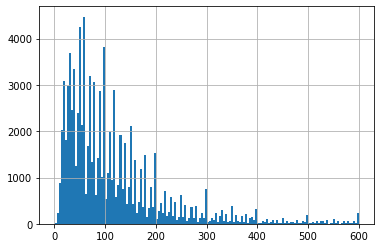

In [67]:
#чтобы разбить клиентов на 5 групп по сумме потраченных средств, посмотрим на распределение Monetary
# для наглядности я обрезала правый хвост, прижатый к оси Х
rfm.query('Monetary<600').Monetary.hist(bins=150)

In [68]:
# границы метрики Monetary определила визуально, на основании графика
# функция для определения M-рейтинга клиента
def m_score(x):
    if x<=50:
        return 1
    elif x<=100:
        return 2
    elif x<=200:
        return 3
    elif x<=400:
        return 4
    else:
        return 5

In [69]:
# теперь расчитаем R, F, M рейтинги для каждого клиента

rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [70]:
rfm.head()

,customer_unique_id,Recency,Monetary,Frequency,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,161,129.90,1,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,18.90,1,3,1,1
2,0000f46a3911fa3c0805444483337064,586,69.00,1,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,370,25.99,1,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,337,180.00,1,2,1,3


## Результат: в:се клиенты разделены на 110 кластеров:

In [71]:
# объединим R, F, M в RFM Score
# в результате полчаем список id клиентов, где для кадого указан номер кластера, к которому он относится:

rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Monetary,Frequency,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,129.90,1,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,18.90,1,3,1,1,311
2,0000f46a3911fa3c0805444483337064,586,69.00,1,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,25.99,1,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,337,180.00,1,2,1,3,213


In [72]:
rfm.RFM_Score.nunique()

110

In [73]:
# посмотрим, в каких сегментах больше всего клиентов
rfm_quantity = rfm.RFM_Score.value_counts().to_frame().reset_index().rename(columns={'RFM_Score':'quantity','index':'RFM_Score'})
rfm_quantity.head()

,RFM_Score,quantity
0,211,11171
1,212,9821
2,213,8873
3,111,7838
4,112,7584


самый многочисленный сегмент оказался № 211:
RFM-сегмент 211 (recency=2, frequency=1, monetary=1) имеет границы метрик recency от 181 до 365 дней, frequency 1 заказ за весь период, monetary менее 50 долларов за весь период. 

In [74]:
# теперь посмотрим на самые высокие в рейтинге сегменты и количество клиентов, которые туда входят
rfm_quantity.sort_values(by='RFM_Score', ascending=False).head(10)

,RFM_Score,quantity
101,555,2
104,545,1
98,544,3
93,543,4
103,541,1
91,535,5
88,534,7
82,533,10
84,532,9
90,525,6


In [75]:
# поскольку сегментов получилось 110 штук и систематизировать их все наглядно довольно сложно,
# для наглядности можно сделать более крупные сегменты по сумме факторов (для общей характеристики клиента)
# (будем исходить из предположения, что все 3 фактора R, F и M одинаково значимы)
# максимальная сумма факторов равна 15 (5+5+5), минимальная - 3 (1+1+1)
# разделим всех клиентов на 13 сегментов по сумме факторов:

rfm['RFM_Summa'] = rfm['R'] + rfm['F'] + rfm['M']

In [76]:
rfm.head()

,customer_unique_id,Recency,Monetary,Frequency,R,F,M,RFM_Score,RFM_Summa
0,0000366f3b9a7992bf8c76cfdf3221e2,161,129.90,1,3,1,3,313,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,18.90,1,3,1,1,311,5
2,0000f46a3911fa3c0805444483337064,586,69.00,1,1,1,2,112,4
3,0000f6ccb0745a6a4b88665a16c9f078,370,25.99,1,1,1,1,111,3
4,0004aac84e0df4da2b147fca70cf8255,337,180.00,1,2,1,3,213,6


In [77]:
# получили 13 сегментов. Чем больше номер сегмента, тем "перспективнее" клиент
# и наоборот, для клиентов из сегментов с небольшой суммой нужно уже лезть в подробности,
# выяснять причины низкой суммы по каждой из трех составляющих и улучшать их по-отдельности

rfm.RFM_Summa.value_counts()

5     21608
6     20157
4     19131
7     13949
3      7838
8      7616
9      3290
10     1232
11      432
12      130
13       32
14        3
15        2
Name: RFM_Summa, dtype: int64

In [78]:
s = rfm.RFM_Summa.value_counts().to_frame()

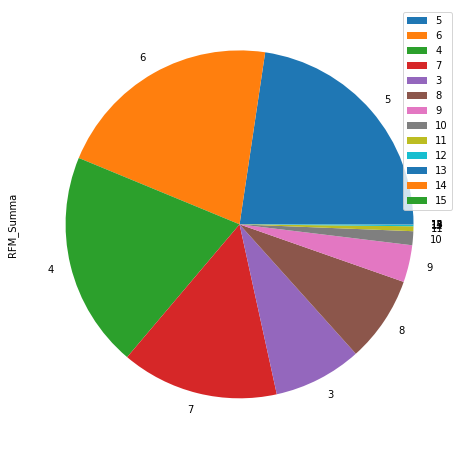

In [79]:
# диаграмма визуализирует доли клиентов с каждой из 13 сумм факторов
s.plot.pie(y='RFM_Summa', figsize=(20,8))